<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [2]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

/Users/lotta/.conda/envs/NLP/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/lotta/.conda/envs/NLP/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


## 1) *Optional:* Scrape 100 Job Listings that contain the title "Data Scientist" from indeed.com

At a minimum your final dataframe of job listings should contain
- Job Title
- Job Description

If you choose to not to scrape the data, there is a CSV with outdated data in the directory. Remeber, if you scrape Indeed, you're helping yourself find a job. ;)

This is mainly for me. I will be separting the data gathering in three ways. Using the Indeed.com API, if approved, using the scraping method with HTML, and using the .csv. Honestly, I prefer APIs whenever possible. 

### Scraping from HTML.

In [3]:
# imports
import requests
import bs4
from bs4 import BeautifulSoup
import time

In [4]:
URL = "https://www.indeed.com/jobs?q=cloud+engineer&l=Draper%2C+UT&radius=50#"
page = requests.get(URL)
soup = BeautifulSoup(page.text, "html.parser")


In [5]:
def getJobTitle(soup):
    jobs = []
    for div in soup.find_all(name="div", attrs={"class":"row"}):
        for a in div.find_all(name="a", attrs={"data-tn-element":"jobTitle"}):
            jobs.append(a["title"])
    return jobs

def getCompany(soup):
    companies = []
    for div in soup.find_all(name="div", attrs={"class":"row"}):
        company = div.find_all(name="span", attrs={"class":"company"})
        if len(company) > 0:
            for b in company:
                companies.append(b.text.strip())
        else:
            sec_try = div.find_all(name="span", attrs={"class":"result-link-source"})
            for span in sec_try:
                companies.append(span.text.strip())
    return(companies)

def getLocations(soup):
    locations = []
    spans = soup.findAll('span', attrs={"class":"location"})
    for span in spans:
        locations.append(span.text)
    return locations

def getDesc(soup):
    descriptions = []
    spans = soup.findAll("div", attrs={"class":"summary"})
    for span in spans:
        descriptions.append(span.text.strip())
    return descriptions

In [6]:
data = getJobTitle(soup)

In [7]:
df = pd.DataFrame(data, columns = ['Job Title'])
df.shape

(18, 1)

In [8]:
df["Company"] = getCompany(soup)
df['Summary'] = getDesc(soup)

In [9]:
location = pd.DataFrame(getLocations(soup), columns = ['Location'])
indeedDesc = pd.concat([df, location], ignore_index=False, axis=1) 

## 2) Use Spacy to tokenize / clean the listings 

In [10]:
# Classics
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

import spacy
nlp = spacy.load("en_core_web_lg")

In [11]:
tokens = []
for i in range(len(indeedDesc['Summary'])):
    doc = nlp(indeedDesc['Summary'][i])
    tokens.append([token.lemma_ for token in doc if (token.is_stop != True) and (token.is_punct != True)])

In [12]:
flatten = list(itertools.chain.from_iterable(tokens))
# Tokens itself was not flattened. 

In [13]:
print(tokens) # list of lists. 

[['build', 'maintain', 'automation', 'platform', 'customer', 'face', 'virtualized', 'cloud', 'environment', 'preferred', 'experience', 'designing', 'run', 'consume'], ['experience', 'Citrix', 'Nutanix', 'cloud', 'infrastructure', 'highly', 'desire', 'Terralogic', 'DynaQuest', 'look', 'Systems', 'Engineer', 'talented', 'team'], ['experience', 'work', 'highly', 'virtualize', 'public', 'private', 'cloud', 'environment', 'Progressive', 'Leasing', 'rapidly', 'grow', 'financial', 'service', 'company'], ['strong', 'knowledge', 'cloud', 'architecture', 'solution', 'product', 'offering', 'architect', 'implement', 'new', 'modern', 'voice', 'infrastructure', 'meet', 'Sorenson', 'cloud'], ['Cloud', 'System', 'Azure', 'aws).dutie', 'include', 'address', 'technical', 'support', 'issue', 'phone', 'email', 'ticket', 'onsite'], ['caching', 'eliminate', 'need', 'repeatedly', 'transmit', 'content', 'web', 'server', 'cloud', 'client', 'improve', 'web'], ['Cloud', 'Platforms', 'AWS', 'Azure', 'Heroku).Lash

In [15]:
print(flatten) # Flat list of string objects. 

['build', 'maintain', 'automation', 'platform', 'customer', 'face', 'virtualized', 'cloud', 'environment', 'preferred', 'experience', 'designing', 'run', 'consume', 'experience', 'Citrix', 'Nutanix', 'cloud', 'infrastructure', 'highly', 'desire', 'Terralogic', 'DynaQuest', 'look', 'Systems', 'Engineer', 'talented', 'team', 'experience', 'work', 'highly', 'virtualize', 'public', 'private', 'cloud', 'environment', 'Progressive', 'Leasing', 'rapidly', 'grow', 'financial', 'service', 'company', 'strong', 'knowledge', 'cloud', 'architecture', 'solution', 'product', 'offering', 'architect', 'implement', 'new', 'modern', 'voice', 'infrastructure', 'meet', 'Sorenson', 'cloud', 'Cloud', 'System', 'Azure', 'aws).dutie', 'include', 'address', 'technical', 'support', 'issue', 'phone', 'email', 'ticket', 'onsite', 'caching', 'eliminate', 'need', 'repeatedly', 'transmit', 'content', 'web', 'server', 'cloud', 'client', 'improve', 'web', 'Cloud', 'Platforms', 'AWS', 'Azure', 'Heroku).Lashbrook', 'look

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
vect.fit(flatten)
dtm = vect.transform(flatten)

In [17]:
dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())


In [18]:
dtm.head()

,262349,address,ajax,api,application,architect,architecture,associate,automate,automation,...,verisys,virtualize,virtualized,voice,wb,web,work,xendesktop,xenserver,year
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4) Visualize the most common word counts

In [19]:
from sklearn.decomposition import PCA

def getWordVectors(words):
    return [nlp(word).vector for word in words]

words = flatten
pca = PCA(n_components=2)
pca.fit(getWordVectors(words))
words_vecs_2d = pca.transform(getWordVectors(words))

/Users/lotta/.conda/envs/NLP/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 61623 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/lotta/.conda/envs/NLP/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 61623 missing from current font.
  font.set_text(s, 0, flags=flags)


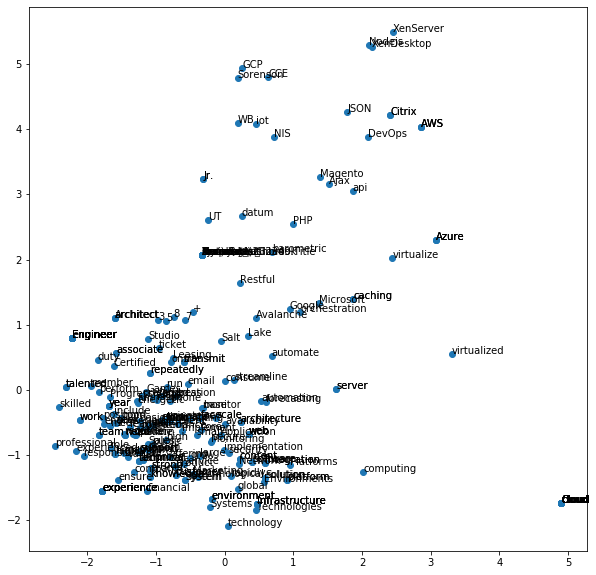

In [20]:
# create a nice big plot 
plt.figure(figsize=(10,10))

# plot the scatter plot of where the words will be
plt.scatter(words_vecs_2d[:,0], words_vecs_2d[:,1])

# for each word and coordinate pair: draw the text on the plot
for word, coord in zip(words, words_vecs_2d):
    x, y = coord
    plt.text(x, y, word, size=10)

# show the plot
plt.show()

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [25]:
def tokenize(document):
    doc = nlp(document)
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True)]

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(tokenizer=tokenize, min_df=0.025, max_df=.98, ngram_range=(1,2))

dtm = tfidf.fit_transform(data)

dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

dtm.head()

,1,1 helpdesk,analyst,architect,architect engineer,associate,city,city ut,cloud,cloud engineer,...,tier,tier 1,ut,virtualization,virtualization architect,voice,wan,wan systems,west,west salt
0,0.000000,0.000000,0.0,0.492855,0.492855,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.492855,0.492855,0.000000,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.421353,0.0,0.0,0.0,0.0
4,0.404331,0.404331,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.404331,0.404331,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [27]:
from sklearn.neighbors import NearestNeighbors


nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [28]:
nn.kneighbors([dtm.iloc[0].values])

(array([[0.        , 1.37207177, 1.37207177, 1.37207177, 1.38422839]]),
 array([[ 0, 11,  7,  9,  6]]))

In [29]:
exampleSummary = [ """
Software engineer with skills in Java, Go, and C++ 
"""]

In [30]:
new = tfidf.transform(exampleSummary)

In [31]:
nn.kneighbors(new.todense())

(array([[0.        , 1.22004723, 1.35143624, 1.35143624, 1.35143624]]),
 array([[ 6,  5, 11,  9,  7]]))

In [36]:
data[7]

'Cloud Engineer'

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 